<a href="https://colab.research.google.com/github/iampundir/Liver-Disease-Project/blob/master/Predictive_Analysis_Liver_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving datasets_2607_4342_indian_liver_patient.csv to datasets_2607_4342_indian_liver_patient.csv


{'datasets_2607_4342_indian_liver_patient.csv': b'Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset\r\n65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1\r\n62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1\r\n62,Male,7.3,4.1,490,60,68,7,3.3,0.89,1\r\n58,Male,1,0.4,182,14,20,6.8,3.4,1,1\r\n72,Male,3.9,2,195,27,59,7.3,2.4,0.4,1\r\n46,Male,1.8,0.7,208,19,14,7.6,4.4,1.3,1\r\n26,Female,0.9,0.2,154,16,12,7,3.5,1,1\r\n29,Female,0.9,0.3,202,14,11,6.7,3.6,1.1,1\r\n17,Male,0.9,0.3,202,22,19,7.4,4.1,1.2,2\r\n55,Male,0.7,0.2,290,53,58,6.8,3.4,1,1\r\n57,Male,0.6,0.1,210,51,59,5.9,2.7,0.8,1\r\n72,Male,2.7,1.3,260,31,56,7.4,3,0.6,1\r\n64,Male,0.9,0.3,310,61,58,7,3.4,0.9,2\r\n74,Female,1.1,0.4,214,22,30,8.1,4.1,1,1\r\n61,Male,0.7,0.2,145,53,41,5.8,2.7,0.87,1\r\n25,Male,0.6,0.1,183,91,53,5.5,2.3,0.7,2\r\n38,Male,1.8,0.8,342,168,441,7.6,4.4,1.3,1\r\n33,Male,1.6,0.5,165,15,23,7.3,3.5,0.92,2\r\n40

In [2]:
!ls

datasets_2607_4342_indian_liver_patient.csv  sample_data


In [4]:
!pip install lifelines

     |████████████████████████████████| 348kB 2.7MB/s 


In [5]:
import pandas as pd
import numpy as np
import missingno
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
#from lifelines import KaplanMeierFitter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
from sklearn.metrics import classification_report,confusion_matrix

In [9]:
df = pd.read_csv('datasets_2607_4342_indian_liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


**EDA**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [11]:
df.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [12]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [13]:
df.nunique() #gender and target is categorical.

Age                            72
Gender                          2
Total_Bilirubin               113
Direct_Bilirubin               80
Alkaline_Phosphotase          263
Alamine_Aminotransferase      152
Aspartate_Aminotransferase    177
Total_Protiens                 58
Albumin                        40
Albumin_and_Globulin_Ratio     69
Dataset                         2
dtype: int64

In [14]:
df.rename(columns={'Dataset':'Target'}, inplace=True)
df['Target'] = df['Target'].apply(lambda x: 0 if x==2 else 1)
df['Gender'] = df['Gender'].apply(lambda x: 0 if x=='Male' else 1)

In [15]:
df.iloc[0,:]

Age                            65.0
Gender                          1.0
Total_Bilirubin                 0.7
Direct_Bilirubin                0.1
Alkaline_Phosphotase          187.0
Alamine_Aminotransferase       16.0
Aspartate_Aminotransferase     18.0
Total_Protiens                  6.8
Albumin                         3.3
Albumin_and_Globulin_Ratio      0.9
Target                          1.0
Name: 0, dtype: float64

In [16]:
df.columns[df.isnull().any()].tolist()

['Albumin_and_Globulin_Ratio']

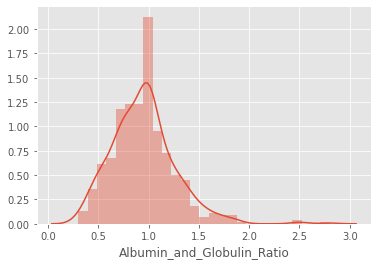

In [17]:
sns.distplot(df['Albumin_and_Globulin_Ratio'])
plt.show()

In [18]:
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean())

In [19]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Target                        0
dtype: int64

In [20]:
df.Target.value_counts()

1    416
0    167
Name: Target, dtype: int64

In [21]:
df.corr()["Target"]

Age                           0.137351
Gender                       -0.082416
Total_Bilirubin               0.220208
Direct_Bilirubin              0.246046
Alkaline_Phosphotase          0.184866
Alamine_Aminotransferase      0.163416
Aspartate_Aminotransferase    0.151934
Total_Protiens               -0.035008
Albumin                      -0.161388
Albumin_and_Globulin_Ratio   -0.162319
Target                        1.000000
Name: Target, dtype: float64

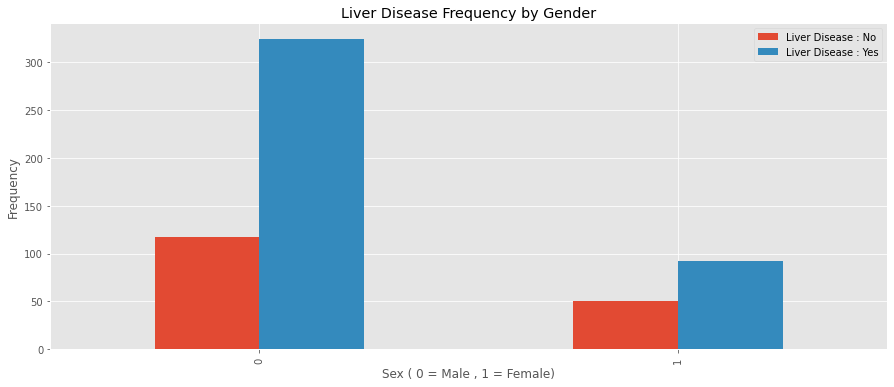

In [22]:
pd.crosstab(df.Gender, df.Target).plot(kind="bar",figsize=(15,6))
plt.title('Liver Disease Frequency by Gender')
plt.xlabel('Sex ( 0 = Male , 1 = Female)')
plt.legend(["Liver Disease : No", "Liver Disease : Yes"])
plt.ylabel('Frequency')
plt.show()

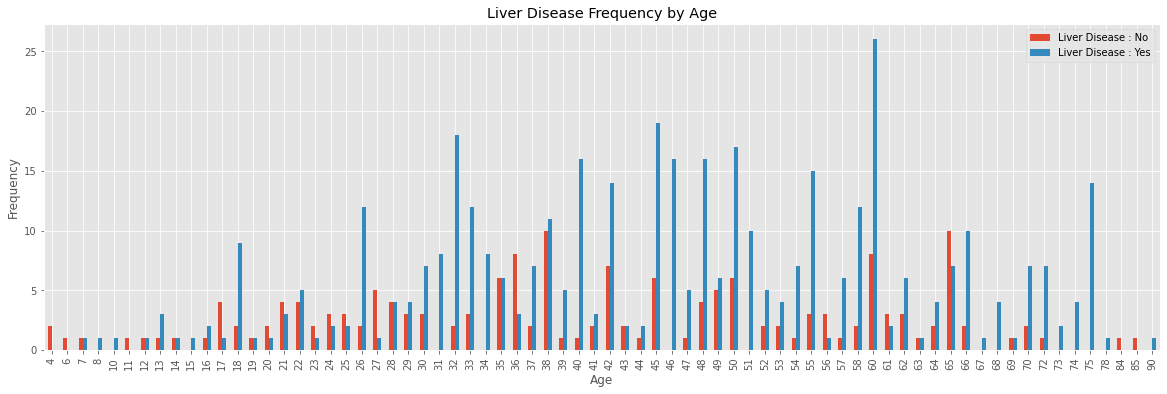

In [23]:
pd.crosstab(df.Age, df.Target).plot(kind="bar",figsize=(20,6))
plt.title('Liver Disease Frequency by Age')
plt.xlabel('Age')
plt.legend(["Liver Disease : No", "Liver Disease : Yes"])
plt.ylabel('Frequency')
plt.show()

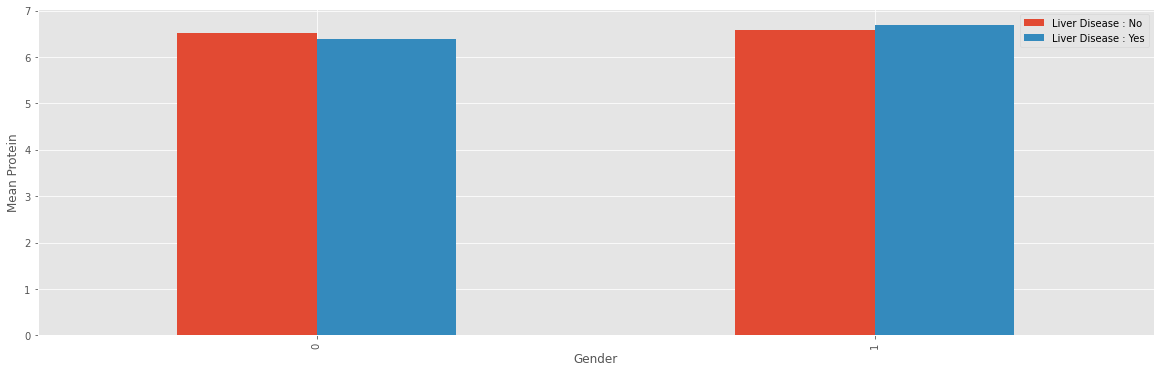

In [24]:
pd.crosstab(df.Gender, df.Target, aggfunc='mean', values=df['Total_Protiens']).plot(kind="bar",figsize=(20,6))
#plt.title('Liver Disease Frequency by Gender')
plt.xlabel('Gender')
plt.legend(["Liver Disease : No", "Liver Disease : Yes"])
plt.ylabel('Mean Protein')
plt.show()

In [25]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Target'],
      dtype='object')

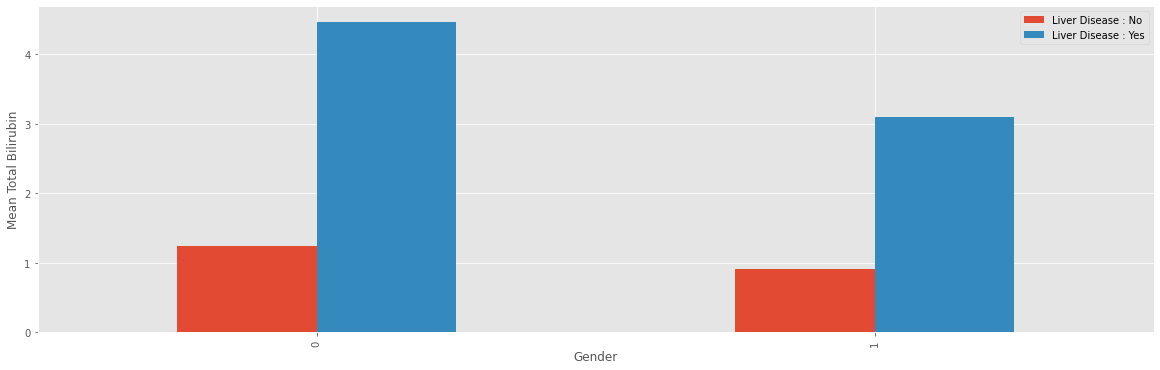

In [26]:
pd.crosstab(df.Gender, df.Target, aggfunc='mean', values=df['Total_Bilirubin']).plot(kind="bar",figsize=(20,6))
plt.xlabel('Gender')
plt.legend(["Liver Disease : No", "Liver Disease : Yes"])
plt.ylabel('Mean Total Bilirubin')
plt.show()

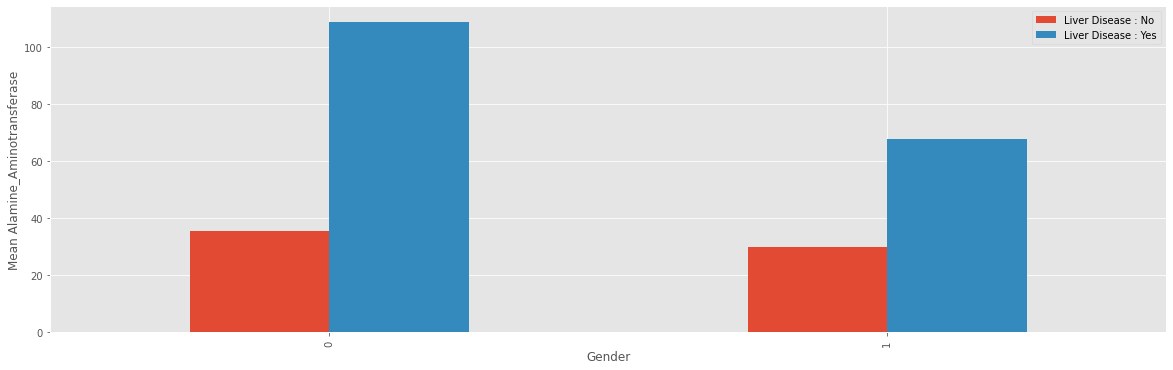

In [27]:
pd.crosstab(df.Gender, df.Target, aggfunc='mean', values=df['Alamine_Aminotransferase']).plot(kind="bar",figsize=(20,6))
plt.xlabel('Gender')
plt.legend(["Liver Disease : No", "Liver Disease : Yes"])
plt.ylabel('Mean Alamine_Aminotransferase')
plt.show()

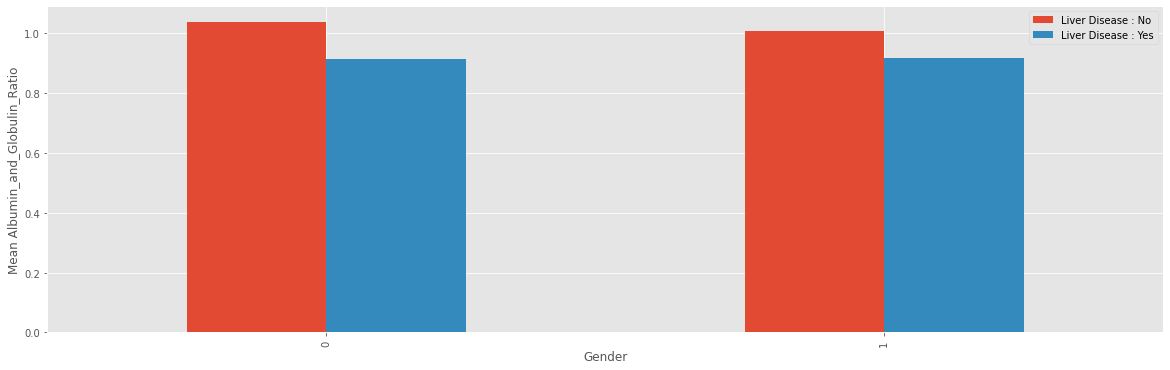

In [28]:
pd.crosstab(df.Gender, df.Target, aggfunc='mean', values=df['Albumin_and_Globulin_Ratio']).plot(kind="bar",figsize=(20,6))
plt.xlabel('Gender')
plt.legend(["Liver Disease : No", "Liver Disease : Yes"])
plt.ylabel('Mean Albumin_and_Globulin_Ratio')
plt.show()

In [29]:
df.head(2)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1


In [30]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Target'],
      dtype='object')

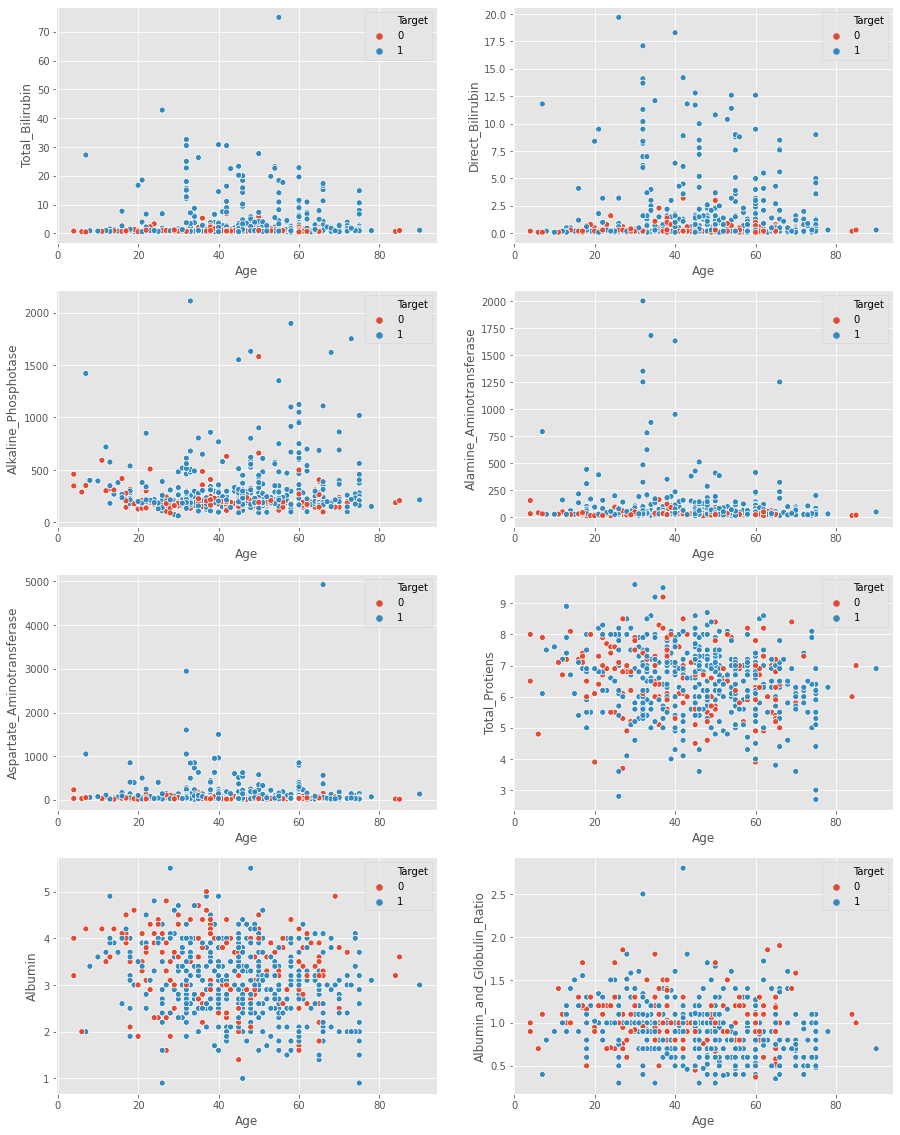

In [31]:
cols = ['Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio']

fig, ax = plt.subplots(4, 2, figsize=(15, 20))
d=0

for i in range(len(ax)):
  for j in range(2):
    sns.scatterplot(x='Age', y=cols[d], hue='Target', data=df, ax=ax[i][j])
    d+=1
plt.show()

Text(0.5, 1.0, 'Correlation between features')

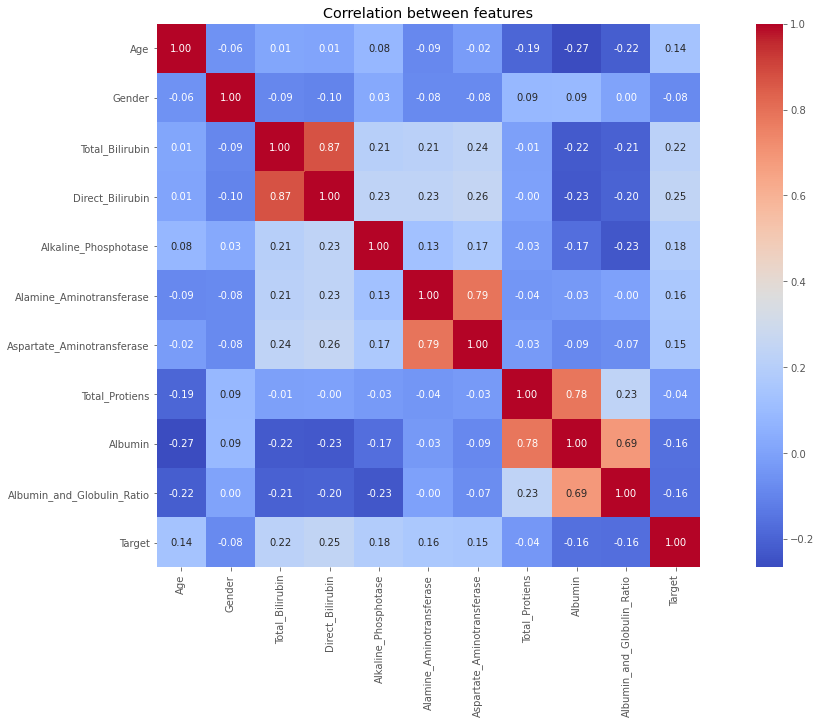

In [32]:
df_corr = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(df_corr, cbar = True,  square = True,  annot=True, fmt= '.2f',annot_kws={'size': 10},
           cmap= 'coolwarm')
plt.title('Correlation between features')

In [33]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Target'],
      dtype='object')

In [34]:
df.drop(columns=["Total_Bilirubin","Alamine_Aminotransferase","Albumin"],axis=1,inplace=True) # high correlation hence removed

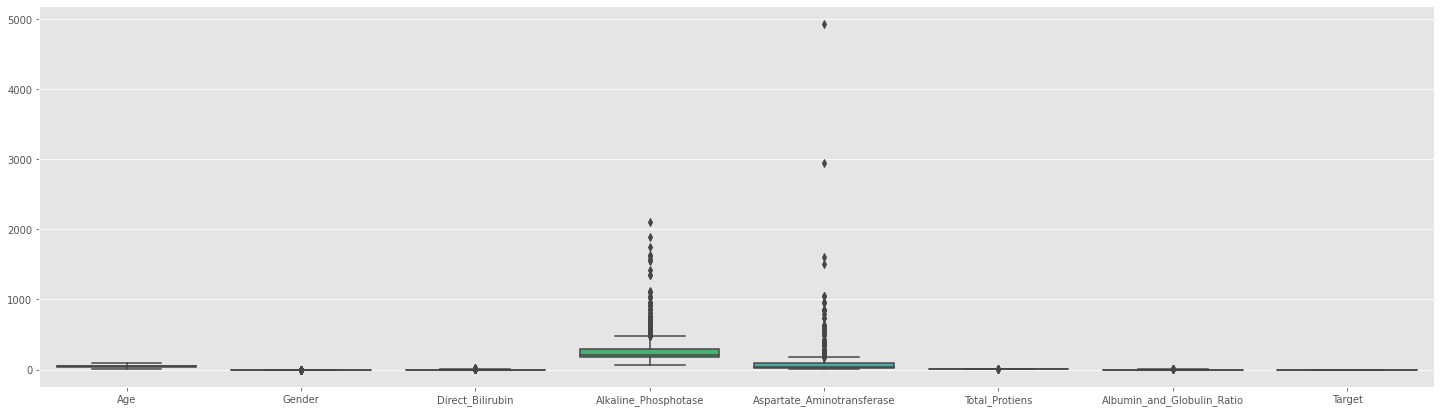

In [35]:
plt.figure(figsize=(25,7))
sns.boxplot(data=df,)

In [36]:
df["log_Alkaline_Phosphotase"]=np.log10(df["Alkaline_Phosphotase"])
df["log_Aspartate_Aminotransferase"]=np.log10(df["Aspartate_Aminotransferase"])

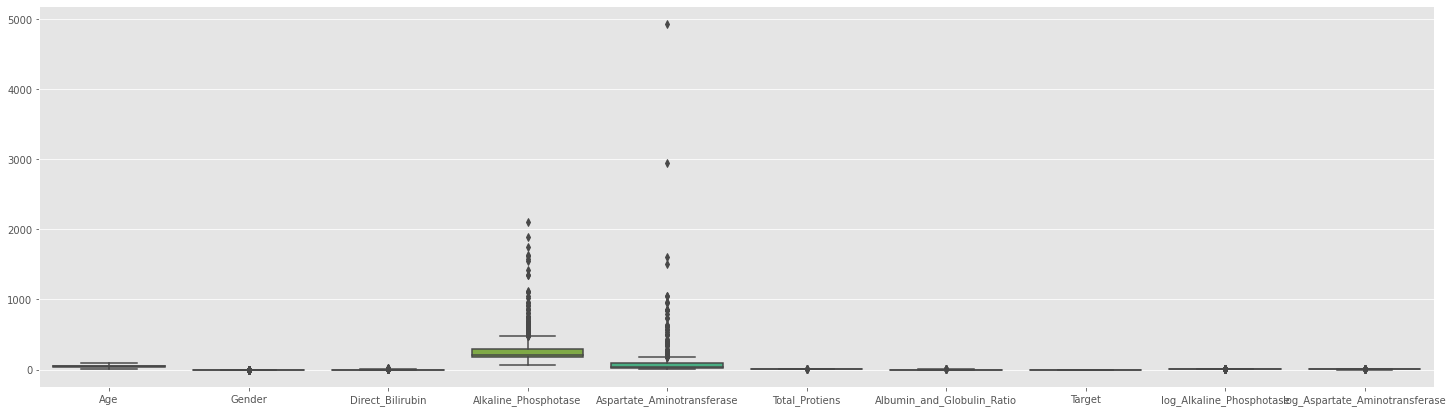

In [37]:
plt.figure(figsize=(25,7))
sns.boxplot(data=df,)

In [38]:
df.drop(columns=["Aspartate_Aminotransferase","Alkaline_Phosphotase"],axis=1,inplace=True)

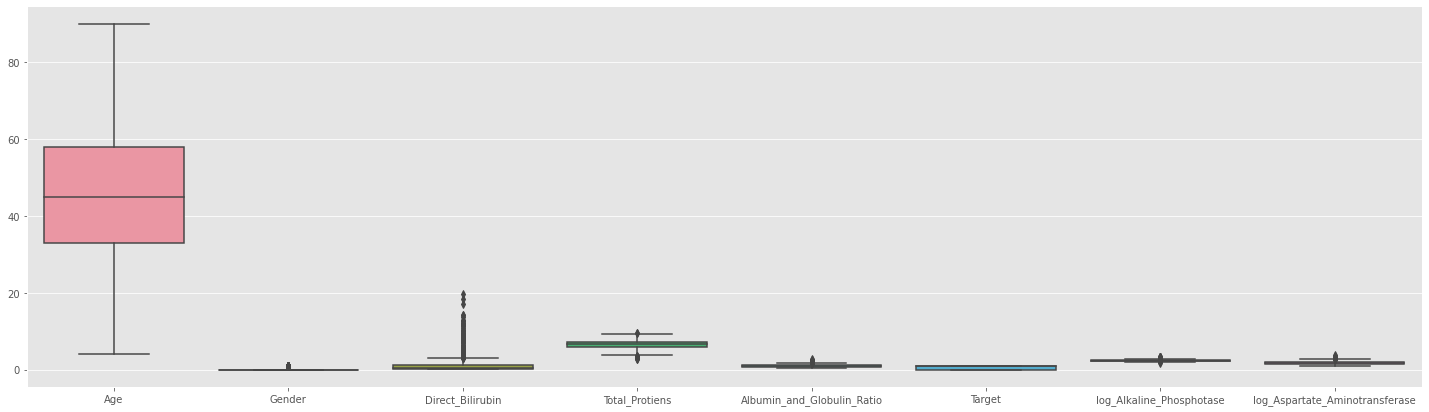

In [39]:
plt.figure(figsize=(25,7))
sns.boxplot(data=df,)

In [40]:
X = df.drop('Target',axis=1)
y = df['Target']
df.head(2)

,Age,Gender,Direct_Bilirubin,Total_Protiens,Albumin_and_Globulin_Ratio,Target,log_Alkaline_Phosphotase,log_Aspartate_Aminotransferase
0,65,1,0.1,6.8,0.90,1,2.271842,1.255273
1,62,0,5.5,7.5,0.74,1,2.844477,2.000000


In [41]:
X.head(2)

,Age,Gender,Direct_Bilirubin,Total_Protiens,Albumin_and_Globulin_Ratio,log_Alkaline_Phosphotase,log_Aspartate_Aminotransferase
0,65,1,0.1,6.8,0.90,2.271842,1.255273
1,62,0,5.5,7.5,0.74,2.844477,2.000000


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(466, 7)
(466,)
(117, 7)
(117,)


In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def model_fit(m):
  
  pipe = Pipeline(steps=[('Scaler', StandardScaler()), ('Classifier', m)])
  pipe.fit(X_train, y_train)

  preds = pipe.predict(X_test)
  
  try :
    for name, importance in zip(X_train.columns, m.feature_importances_):
        print(name, "=", importance)
  except :
    print("Not applicable")
  print("-------")    
  print('Classification Report: \n', classification_report(y_test, preds))
  tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
  print((tn, fp, fn, tp))
  sns.heatmap(confusion_matrix(y_test,preds),annot=True,fmt="d")

Not applicable
-------
Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.76      0.60        37
           1       0.85      0.65      0.74        80

    accuracy                           0.68       117
   macro avg       0.68      0.70      0.67       117
weighted avg       0.74      0.68      0.69       117

(28, 9, 28, 52)


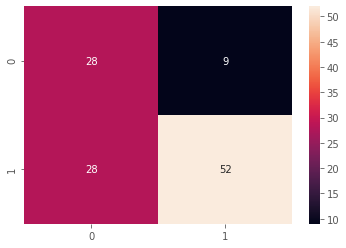

In [44]:
model_fit(LogisticRegression(class_weight='balanced', random_state=42))

Age = 0.16454569711418293
Gender = 0.021772851832263473
Direct_Bilirubin = 0.15661984359070608
Total_Protiens = 0.13215478799411856
Albumin_and_Globulin_Ratio = 0.11628159319310787
log_Alkaline_Phosphotase = 0.19457182396283024
log_Aspartate_Aminotransferase = 0.21405340231279094
-------
Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.30      0.38        37
           1       0.73      0.88      0.80        80

    accuracy                           0.69       117
   macro avg       0.63      0.59      0.59       117
weighted avg       0.66      0.69      0.66       117

(11, 26, 10, 70)


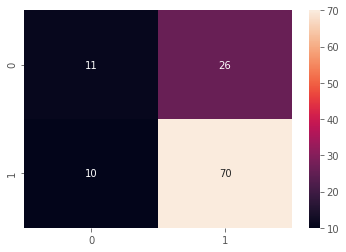

In [45]:
model_fit(RandomForestClassifier(n_estimators=100, random_state=42,class_weight="balanced"))

Age = 0.198
Gender = 0.005
Direct_Bilirubin = 0.039
Total_Protiens = 0.108
Albumin_and_Globulin_Ratio = 0.068
log_Alkaline_Phosphotase = 0.288
log_Aspartate_Aminotransferase = 0.294
-------
Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.35      0.39        37
           1       0.73      0.80      0.76        80

    accuracy                           0.66       117
   macro avg       0.59      0.58      0.58       117
weighted avg       0.64      0.66      0.65       117

(13, 24, 16, 64)


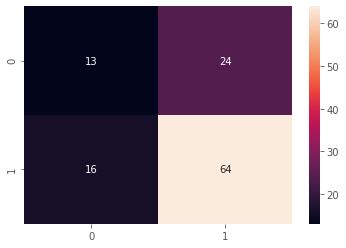

In [46]:
#adaboost, baggingclf, DT, SVC, LinearSVC
model_fit(AdaBoostClassifier(n_estimators=1000, random_state=123))
#tn, fp, fn, tp 

Not applicable
-------
Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.32      0.40        37
           1       0.73      0.86      0.79        80

    accuracy                           0.69       117
   macro avg       0.63      0.59      0.60       117
weighted avg       0.67      0.69      0.67       117

(12, 25, 11, 69)


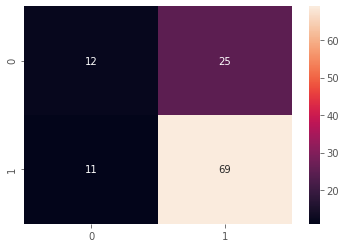

In [47]:
model_fit(BaggingClassifier(n_estimators=100, random_state=123))
#tn, fp, fn, tp 

Not applicable
-------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.05      0.10        37
           1       0.70      1.00      0.82        80

    accuracy                           0.70       117
   macro avg       0.85      0.53      0.46       117
weighted avg       0.79      0.70      0.59       117

(2, 35, 0, 80)


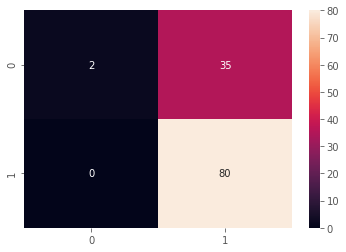

In [48]:
model_fit(SVC(random_state=123))
#tn, fp, fn, tp 

Not applicable
-------
Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.11      0.18        37
           1       0.70      0.96      0.81        80

    accuracy                           0.69       117
   macro avg       0.64      0.54      0.50       117
weighted avg       0.66      0.69      0.61       117

(4, 33, 3, 77)


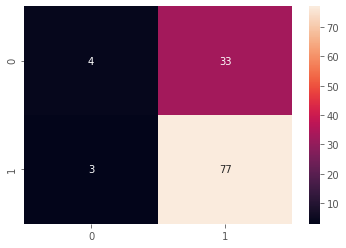

In [49]:
model_fit(LinearSVC(max_iter=5000,random_state=123))

In [50]:
# can tune and choose model or just select from choices above